## Análisis convergencia por fase y ciclo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Graficando datos de la fase estrategica, ciclo 1


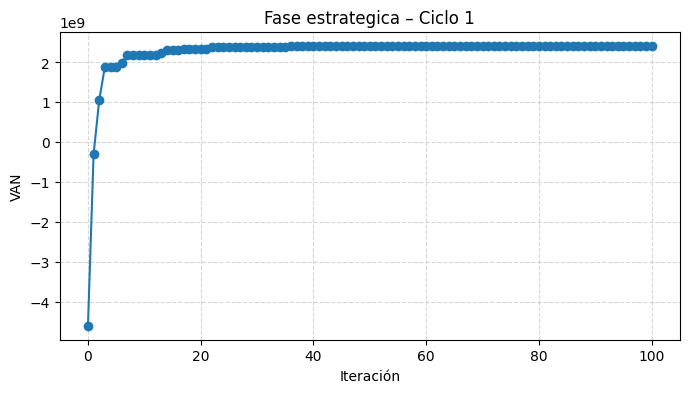

Graficando datos de la fase estrategica, ciclo 2


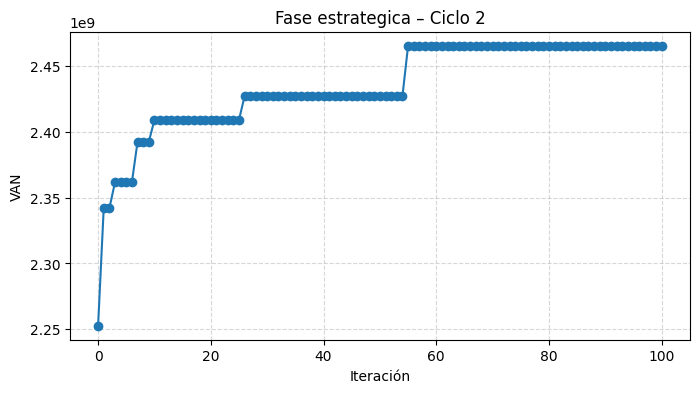

Graficando datos de la fase tactica, ciclo 1


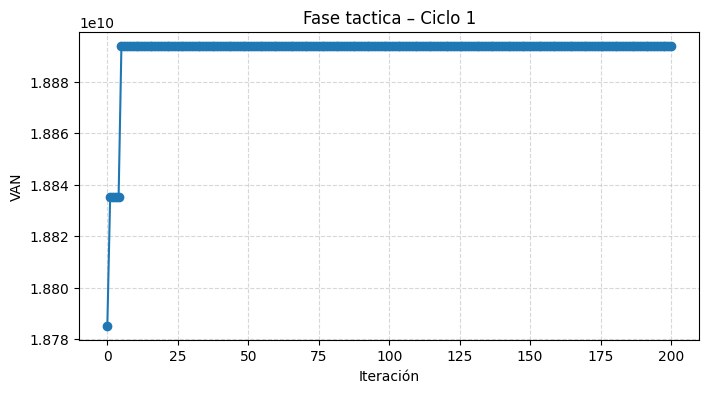

Graficando datos de la fase tactica, ciclo 2


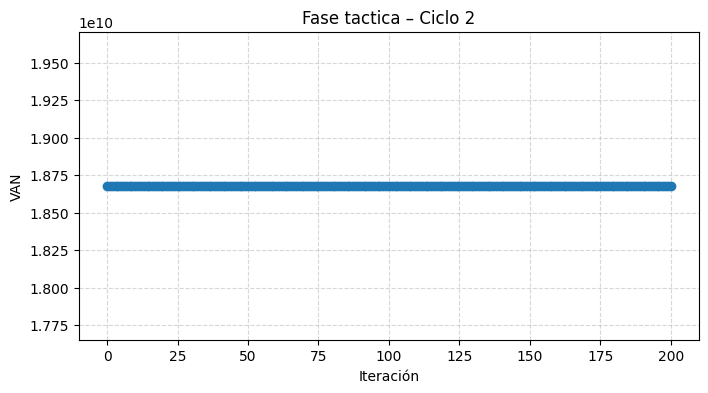

In [3]:
fases = ['estrategica', 'tactica']
for f in fases:
    for i in range(1, 3):
        df = pd.read_csv(f'van_fase_{f}_ciclo_{i}.csv')
        #graficar df
        print(f'Graficando datos de la fase {f}, ciclo {i}')
        plt.figure(figsize=(8, 4))
        plt.plot(df['iteracion'], df['van'], marker='o')
        
        plt.title(f'Fase {f} – Ciclo {i}')
        plt.xlabel('Iteración')
        plt.ylabel('VAN')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Mostrar gráfico
        plt.show()


Graficando datos de la fase operacional, ciclo 1, año 0


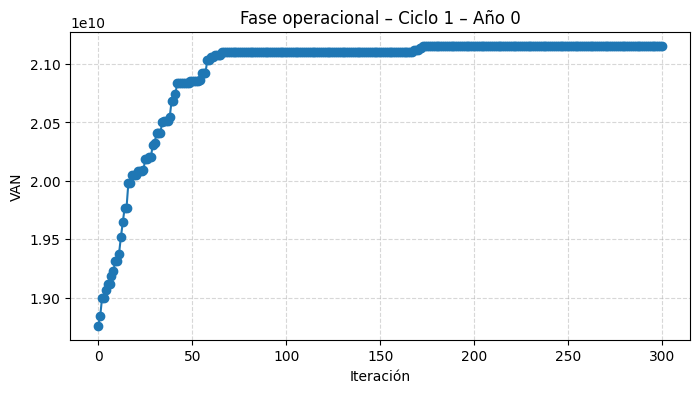

Graficando datos de la fase operacional, ciclo 1, año 1


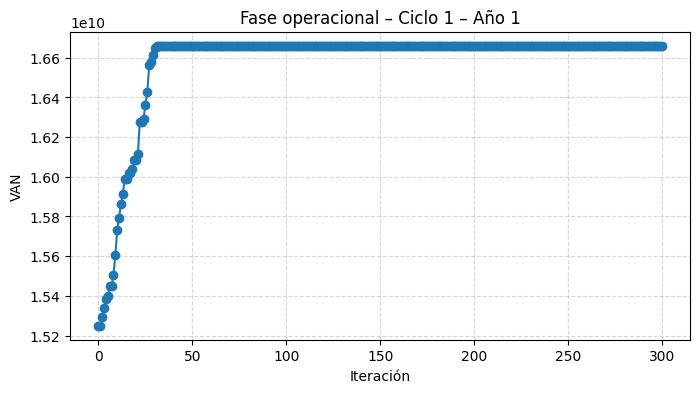

Graficando datos de la fase operacional, ciclo 1, año 2


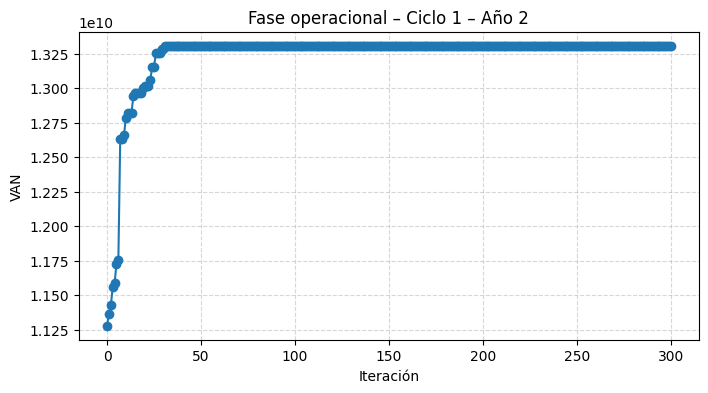

Graficando datos de la fase operacional, ciclo 1, año 3


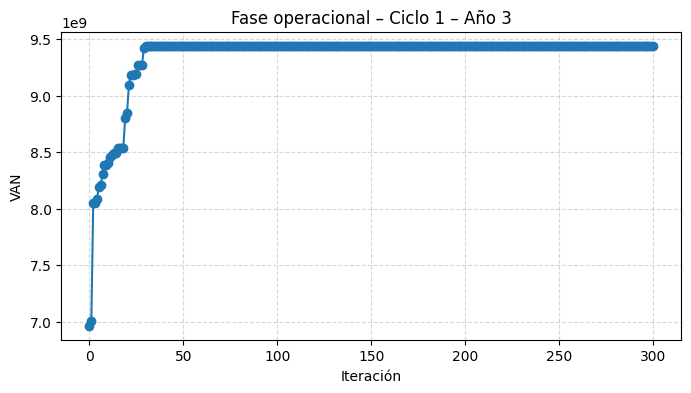

Graficando datos de la fase operacional, ciclo 1, año 4


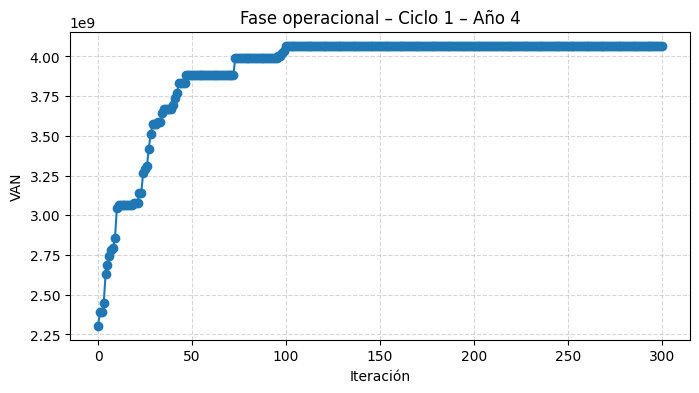

Graficando datos de la fase operacional, ciclo 2, año 0


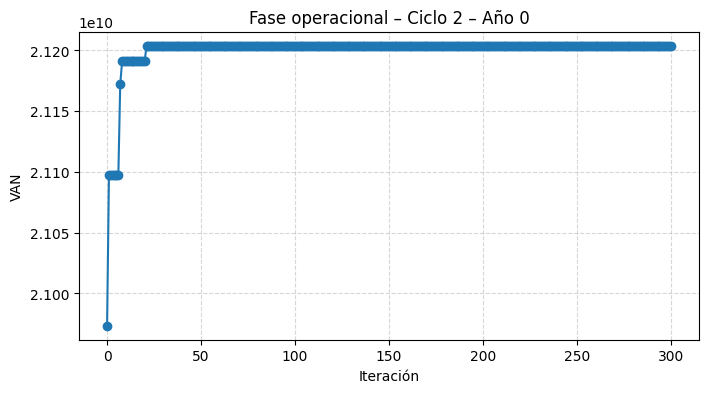

Graficando datos de la fase operacional, ciclo 2, año 1


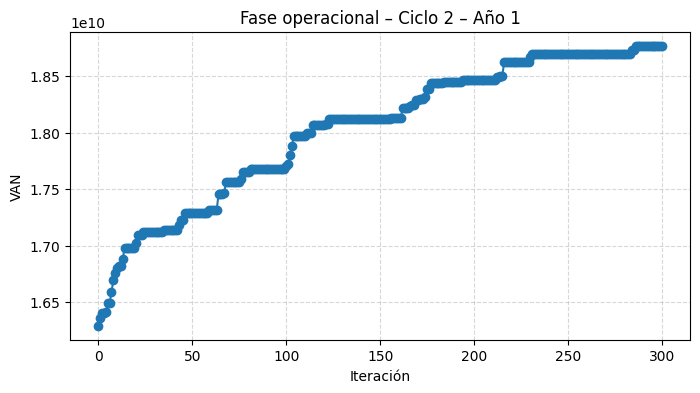

Graficando datos de la fase operacional, ciclo 2, año 2


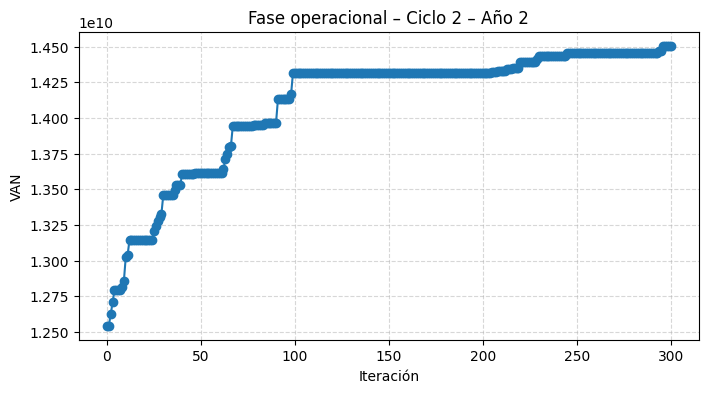

Graficando datos de la fase operacional, ciclo 2, año 3


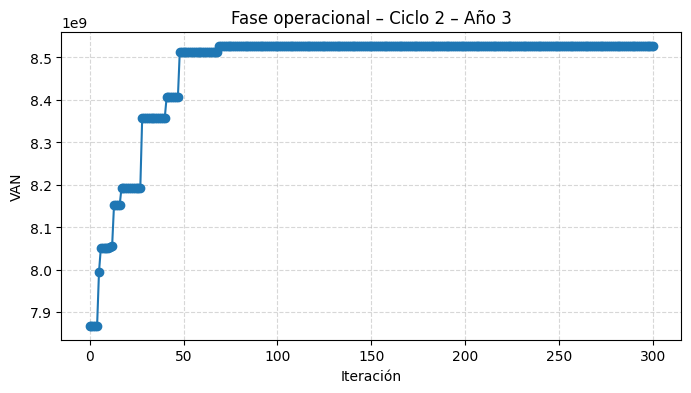

Graficando datos de la fase operacional, ciclo 2, año 4


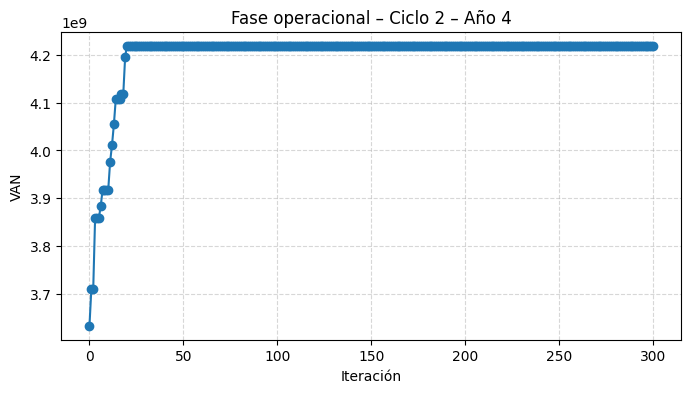

In [5]:
for i in range(1, 3):
    for j in range(0,5):
            df = pd.read_csv(f'van_fase_operacional_ciclo_{i}_anio_{j}.csv')
            #graficar df
            print(f'Graficando datos de la fase operacional, ciclo {i}, año {j}')
            plt.figure(figsize=(8, 4))
            plt.plot(df['iteracion'], df['van'], marker='o')
            
            plt.title(f'Fase operacional – Ciclo {i} – Año {j}')
            plt.xlabel('Iteración')
            plt.ylabel('VAN')
            plt.grid(True, linestyle='--', alpha=0.5)

            # Mostrar gráfico
            plt.show()

# Visualizar fase operacional por año y ciclo

In [9]:
import json
from pathlib import Path

In [11]:
for i in range(1, 3):
    for j in range(0, 5):
        path = Path(f'config_fase_operacional_ciclo_{i}_anio_{j}.csv')
        if not path.exists():
            continue
         # leer la última línea no vacía
        with path.open(encoding='utf-8') as f:
            lines = [l for l in f.readlines() if l.strip()]
            if not lines:
                continue
            last_line = lines[-1].strip()

        # separar por la primera coma (la parte JSON puede contener muchas comas)
        try:
            _, json_part = last_line.split(',', 1)
            data = json.loads(json_part)
        except Exception as e:
            print(f"Error leyendo {path}: {e}")
            continue

        # ahora imprimir solo la última fila (los conteos por hora)
        print(f' ============== Configuración fase operacional – Ciclo {i} – Año {j} ==============')
        for dia in ["normal", "oferta", "domingo"]:
            print(dia + ":")
            dia_data = data.get(dia, {})
            for hora in range(8, 22):
                hora_info = dia_data.get(str(hora), {})
                val = len(hora_info.get("regular", []))
                print(f"{hora}: {val} cajas regulares abiertas")
            print()

 ============== Configuración fase operacional – Ciclo 1 – Año 0 ==============
normal:
8: 7 cajas regulares abiertas
9: 14 cajas regulares abiertas
10: 15 cajas regulares abiertas
11: 24 cajas regulares abiertas
12: 29 cajas regulares abiertas
13: 29 cajas regulares abiertas
14: 15 cajas regulares abiertas
15: 12 cajas regulares abiertas
16: 21 cajas regulares abiertas
17: 29 cajas regulares abiertas
18: 29 cajas regulares abiertas
19: 29 cajas regulares abiertas
20: 19 cajas regulares abiertas
21: 6 cajas regulares abiertas

oferta:
8: 3 cajas regulares abiertas
9: 6 cajas regulares abiertas
10: 15 cajas regulares abiertas
11: 29 cajas regulares abiertas
12: 29 cajas regulares abiertas
13: 29 cajas regulares abiertas
14: 29 cajas regulares abiertas
15: 29 cajas regulares abiertas
16: 27 cajas regulares abiertas
17: 29 cajas regulares abiertas
18: 27 cajas regulares abiertas
19: 21 cajas regulares abiertas
20: 3 cajas regulares abiertas
21: 4 cajas regulares abiertas

domingo:
8: 3 ca

In [8]:
for i in range(1,3):
    for j in range(0,5):
        data = pd.read_csv(open(f'config_fase_operacional_ciclo_{i}_anio_{j}.csv'))  # o json.loads(cadena_json)
        for dia in ["normal", "oferta", "domingo"]:
            print(dia + ":")
            dia_data = data.get(dia, {})
            for hora in range(8, 22):
                val = dia_data.get(str(hora), 0)
                print(f"{hora}: {val} cajas regulares abiertas")
            print()

normal:
8: 0 cajas regulares abiertas
9: 0 cajas regulares abiertas
10: 0 cajas regulares abiertas
11: 0 cajas regulares abiertas
12: 0 cajas regulares abiertas
13: 0 cajas regulares abiertas
14: 0 cajas regulares abiertas
15: 0 cajas regulares abiertas
16: 0 cajas regulares abiertas
17: 0 cajas regulares abiertas
18: 0 cajas regulares abiertas
19: 0 cajas regulares abiertas
20: 0 cajas regulares abiertas
21: 0 cajas regulares abiertas

oferta:
8: 0 cajas regulares abiertas
9: 0 cajas regulares abiertas
10: 0 cajas regulares abiertas
11: 0 cajas regulares abiertas
12: 0 cajas regulares abiertas
13: 0 cajas regulares abiertas
14: 0 cajas regulares abiertas
15: 0 cajas regulares abiertas
16: 0 cajas regulares abiertas
17: 0 cajas regulares abiertas
18: 0 cajas regulares abiertas
19: 0 cajas regulares abiertas
20: 0 cajas regulares abiertas
21: 0 cajas regulares abiertas

domingo:
8: 0 cajas regulares abiertas
9: 0 cajas regulares abiertas
10: 0 cajas regulares abiertas
11: 0 cajas regula